In [61]:
import serial
import sys
from itertools import count
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [26]:
try:
  ser = serial.Serial("COM3", 9600)
except:
  sys.exit("Error connecting device")

In [56]:
accx_list = list()
accy_list = list()
accz_list = list()
index = count()

In [ ]:
# def animate(i):
#     queue = ser.inWaiting()
#     if queue > 0:
#         data = ser.readline()
#         valueInString = str(data, 'UTF-8')
        
#         if valueInString[0] == 'V':
#             print(valueInString)

#         plt.cla()
#         plt.plot(acc_x, acc_y, acc_z)
#         plt.tight_layout()

In [27]:
acc_list = list()
gyro_list = list()
mag_list = list()

while True: 
    queue = ser.inWaiting()
    if queue > 0:
        acc = ser.readline()
        acc_list.append(acc)
        
        gyro = ser.readline()
        gyro_list.append(gyro)

        mag = ser.readline()
        mag_list.append(mag)

        if len(acc_list) == 100: 
            break

In [85]:

for i in acc_list:
    accx_list.append(float((str(i)[2:-3]).split(',')[0][1:]))
    accy_list.append(float((str(i)[2:-3]).split(',')[1]))
    accz_list.append(float((str(i).split(",")[2][:-4])))

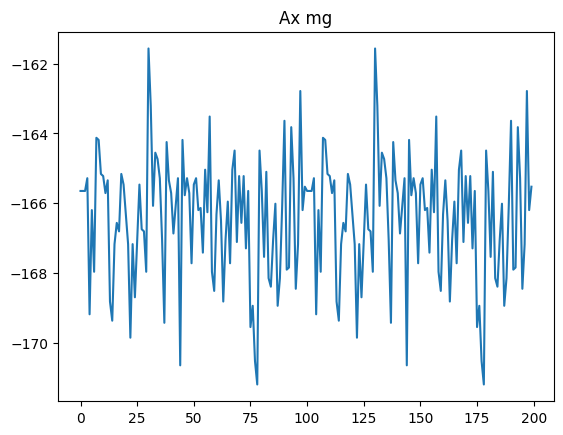

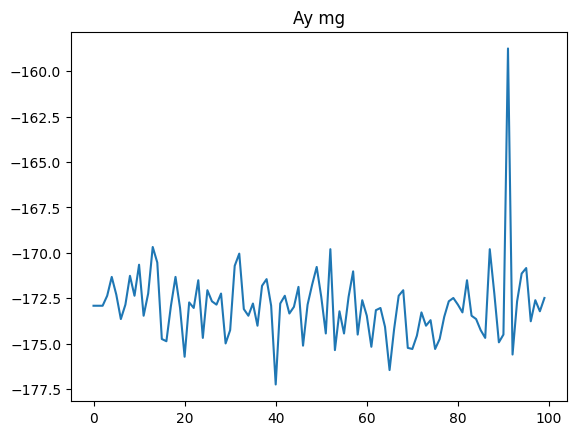

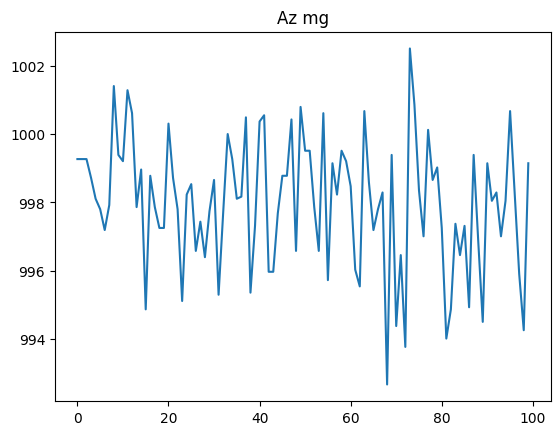

In [90]:
%matplotlib inline
plt.cla()
plt.title("Ax mg")
plt.plot(accx_list)
plt.show()


plt.cla()
plt.title("Ay mg")
plt.plot(accy_list)
plt.show()


plt.cla()
plt.title("Az mg")
plt.plot(accz_list)
plt.show()


In [46]:
with open("data.txt","w") as f :
    for i in acc_list:
        f.write((str(i)[2:-3]))
        f.write("\n")

with open("data_gyro.txt","w") as f :
    for i in gyro_list:
        f.write((str(i)[2:-3]))
        f.write("\n")
        
        
with open("data_mg.txt","w") as f :
    for i in mag_list:
        f.write((str(i)[2:-3]))
        f.write("\n")

In [ ]:
# ani = FuncAnimation(plt.gcf(), animate, interval=1000)
# plt.tight_layout()
# plt.show()